In [1]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
import keras_preprocessing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard
tf.__version__

C:\Users\ANIL THANVI\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ANIL THANVI\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ANIL THANVI\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ANIL THANVI\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:5

'1.14.0'

In [2]:
from keras.layers import Convolution2D

In [3]:
from keras.layers import MaxPooling2D

In [4]:
from keras.layers import Dense

In [5]:
from keras.layers import Flatten

In [6]:
from keras.models import Sequential

In [7]:
model = Sequential()

In [8]:
model.add(Convolution2D(filters=32, 
                        kernel_size=(3,3), 
                        activation='relu',
                        input_shape=(64, 64, 3)
                        ))

In [9]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [10]:
model.add(Convolution2D(filters=32, 
                        kernel_size=(3,3), 
                        activation='relu',
                        ))

In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
model.add(Flatten())

In [13]:
model.add(Dense(units=128, activation='relu'))

In [14]:
model.add(Dense(units=10, activation='softmax'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
train_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'C://Users//ANIL THANVI//Desktop//Machine Learning A-Z Template Folder//Tomato//New Plant Diseases Dataset(Augmented)//train',
         target_size=(64, 64),
         batch_size=32,
         class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        'C://Users//ANIL THANVI//Desktop//Machine Learning A-Z Template Folder//Tomato//New Plant Diseases Dataset(Augmented)//valid',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [21]:
history = model.fit(
        training_set,
        steps_per_epoch=800,
        epochs=5,
        validation_data=test_set,
        validation_steps=80)


Epoch 1/5
800/800 [==============================] - 873s 1s/step - loss: 0.9902 - accuracy: 0.6575 - val_loss: 0.4034 - val_accuracy: 0.7871
Epoch 2/5
800/800 [==============================] - 957s 1s/step - loss: 0.5013 - accuracy: 0.8270 - val_loss: 0.1278 - val_accuracy: 0.8490
Epoch 3/5
800/800 [==============================] - 531s 664ms/step - loss: 0.3718 - accuracy: 0.8690 - val_loss: 0.8895 - val_accuracy: 0.7316
Epoch 4/5
800/800 [==============================] - 528s 660ms/step - loss: 0.3118 - accuracy: 0.8891 - val_loss: 0.4841 - val_accuracy: 0.8427
Epoch 5/5
800/800 [==============================] - 528s 660ms/step - loss: 0.2557 - accuracy: 0.9107 - val_loss: 0.3918 - val_accuracy: 0.8434


In [23]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

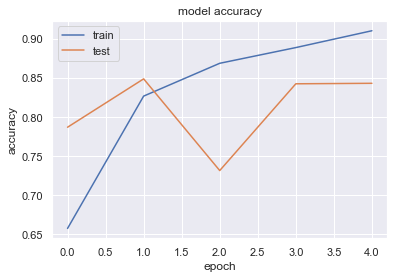

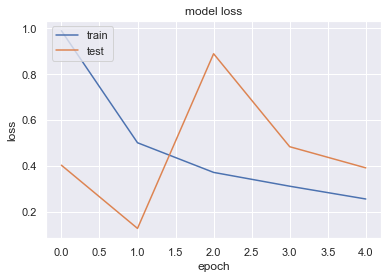

In [24]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
model.evaluate(test_set)

144/144 [==============================] - 34s 238ms/step


[0.5057907700538635, 0.8501635789871216]